# 🚀 EDA for Financial Complaints
**Approach by:** [Teferi Mamo]
**Date:** [7/6/2025]
## 🔍 Differentiators:
1. **Dynamic Complaint Segmentation**: Auto-detects complaint phases (issue → impact → resolution demand)
2. **Financial Entity Recognition**: Specialized extraction of monetary values, account types, and transaction patterns
3. **Temporal Hotspot Analysis**: Identifies complaint frequency correlations with business events
4. **Cross-Product Contagion Detection**: Finds complaint patterns that spread between products

In [1]:
# Dependency Management
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from datetime import datetime
    from pathlib import Path
    from IPython.display import display
    import re
    import warnings
    warnings.filterwarnings('ignore')
except ImportError as e:
    print(f"Installing missing dependencies: {e}")
    import sys
    !{sys.executable} -m pip install seaborn pandas numpy matplotlib pyarrow
    from tqdm import tqdm
    import json
    
# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
# Visualization Setup
FIN_PALETTE = ["#002366", "#006400", "#8B0000", "#FFD700", "#9400D3"]
sns.set_palette(FIN_PALETTE)
plt.style.use('ggplot')

## 📥 Robust Data Loading with Validation
**Fixed:** Proper handling of monetary references extraction

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
from pathlib import Path
from IPython.display import display

def load_complaints_with_validation(path):
    """
    Final production-ready version with:
    - Proper column validation
    - Correct quality report structure
    - Robust error handling
    """
    try:
        path = Path(path).absolute()
        print(f"📂 Loading data from: {path}")
        
        df = pd.read_csv(path, parse_dates=['Date received'], low_memory=False)
        
        # Validate required columns exist
        required_cols = ['Date received', 'Product', 'Consumer complaint narrative']
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")
            
    except Exception as e:
        print(f"❌ Error loading data: {str(e)}")
        return None, None
    
    # Generate proper quality metrics
    quality_metrics = {
        'Records loaded': len(df),
        'Date null %': float(df['Date received'].isnull().mean()),
        'Product null %': float(df['Product'].isnull().mean()),
        'Narrative null %': float(df['Consumer complaint narrative'].isnull().mean()),
        'Valid dates %': float((df['Date received'] > datetime(2010,1,1)).mean()),
        'Quality narratives %': float(df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()) > 10).mean())
    }
    
    # Enhanced monetary extraction
    def extract_monetary(text):
        try:
            text = str(text)
            matches = re.findall(r'\$([\d,]+\.?\d*)', text)
            if matches:
                return float(matches[0].replace(',', ''))
            return np.nan
        except:
            return np.nan
    
    df['monetary_amount'] = df['Consumer complaint narrative'].apply(extract_monetary)
    
    return df, quality_metrics

def generate_sample_data():
    """Generate realistic sample financial complaints"""
    try:
        dates = pd.date_range('2020-01-01', periods=1000, freq='D')
        products = ['Credit Card', 'Personal Loan', 'BNPL', 'Savings Account', 'Money Transfer']
        issues = [
            "incorrect charge", "late fee", "unauthorized transaction",
            "payment processing delay", "account access problem"
        ]
        
        df = pd.DataFrame({
            'Date received': np.random.choice(dates, 1000),
            'Product': np.random.choice(products, 1000, p=[0.3, 0.2, 0.2, 0.15, 0.15]),
            'Consumer complaint narrative': [
                f"I'm writing about my {prod} account. There was an issue with {np.random.choice(issues)} "
                f"involving ${np.random.randint(50,5000)}. {np.random.choice(['This needs resolution ASAP.', ''])}"
                for prod in np.random.choice(products, 1000)
            ]
        })
        
        metrics = {
            'Records loaded': 1000,
            'Date null %': 0.0,
            'Product null %': 0.0,
            'Narrative null %': 0.0,
            'Valid dates %': 1.0,
            'Quality narratives %': 1.0
        }
        
        return df, metrics
    except Exception as e:
        print(f"❌ Error generating sample data: {e}")
        return pd.DataFrame(), {}

def display_quality_report(metrics):
    """Professional quality metrics display"""
    try:
        if not metrics:
            print("No quality metrics available")
            return
            
        # Create DataFrame with numeric values for styling
        report_data = {
            'Metric': [
                'Records loaded',
                'Date null %',
                'Product null %', 
                'Narrative null %',
                'Valid dates %',
                'Quality narratives %'
            ],
            'Value': [
                metrics['Records loaded'],
                metrics['Date null %'],
                metrics['Product null %'],
                metrics['Narrative null %'],
                metrics['Valid dates %'],
                metrics['Quality narratives %']
            ],
            'Display': [
                f"{metrics['Records loaded']:,}",
                f"{metrics['Date null %']:.1%}",
                f"{metrics['Product null %']:.1%}",
                f"{metrics['Narrative null %']:.1%}",
                f"{metrics['Valid dates %']:.1%}",
                f"{metrics['Quality narratives %']:.1%}"
            ]
        }
        
        report_df = pd.DataFrame(report_data)
        
        # Apply styling only to numeric columns
        styled_df = (report_df.style
            .format({'Display': '{}'})
            .hide(axis='index')
            .set_properties(subset=['Display'], **{'text-align': 'right'})
            .bar(subset=['Value'], color='#d65f5f', vmin=0, vmax=1)
            .set_caption("📊 Data Quality Metrics"))
        
        display(styled_df)
        
    except Exception as e:
        print(f"⚠️ Error displaying report: {e}")
        display(pd.DataFrame.from_dict(metrics, orient='index'))

# Main execution
try:
    # Try loading real data
    data_path = Path(r"C:\Users\tefer\creditrust-ai-complaints\data\raw\complaints.csv")
    complaints, quality_metrics = load_complaints_with_validation(data_path)
    
    # Fallback to sample data if needed
    if complaints is None or complaints.empty:
        print("⚠️ Falling back to sample data")
        complaints, quality_metrics = generate_sample_data()
    
    # Display results
    print("\n" + "="*50)
    display_quality_report(quality_metrics)
    
    print("\n" + "="*50)
    print("🔍 Data Preview (First 3 Records):")
    display(complaints.head(3).style.set_properties(**{
        'background-color': '#f8f9fa',
        'border': '1px solid #dee2e6'
    }))
    
except Exception as e:
    print(f"‼️ Critical error in main execution: {e}")

📂 Loading data from: C:\Users\tefer\creditrust-ai-complaints\data\raw\complaints.csv



Metric,Value,Display
Records loaded,1048575.000000,"1,048,575"
Date null %,0.904632,90.5%
Product null %,0.904632,90.5%
Narrative null %,0.998270,99.8%
Valid dates %,0.095368,9.5%
Quality narratives %,0.001725,0.2%



🔍 Data Preview (First 3 Records):


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,monetary_amount
0,2025-06-20 00:00:00,Credit reporting or other personal consumer reports,Credit reporting,Incorrect information on your report,Information belongs to someone else,nan,nan,Experian Information Solutions Inc.,FL,32092,nan,nan,Web,6/20/2025,In progress,Yes,nan,14195687.000000,nan
1,2025-06-20 00:00:00,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,nan,Company can't verify or dispute the facts in the complaint,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,nan,nan,Web,6/20/2025,Closed with explanation,Yes,nan,14195688.000000,nan
2,2025-06-20 00:00:00,Credit reporting or other personal consumer reports,Credit reporting,Improper use of your report,Reporting company used your report improperly,nan,nan,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,nan,nan,Web,6/20/2025,In progress,Yes,nan,14195689.000000,nan


## � Enhanced Financial Text Preprocessing
**Fixed:** More robust text handling

In [3]:
def financial_text_preprocessing(text):
    """
    Improved version with better error handling
    """
    if pd.isna(text):
        return ""
    
    try:
        # Preserve monetary values and dates
        monetary = re.findall(r'\$\d+(?:\.\d+)?', str(text))
        dates = re.findall(r'\d{1,2}/\d{1,2}/\d{2,4}', str(text))
        
        # Standard cleaning
        text = str(text).lower()
        text = re.sub(r'[^\w\s\$\%\/]', '', text)  # Keep financial symbols
        
        return text
    except Exception as e:
        print(f"Error processing text: {e}")
        return ""

# Apply preprocessing
complaints['clean_text'] = complaints['Consumer complaint narrative'].apply(financial_text_preprocessing)

## 📊 Product Analysis with Error Resilience

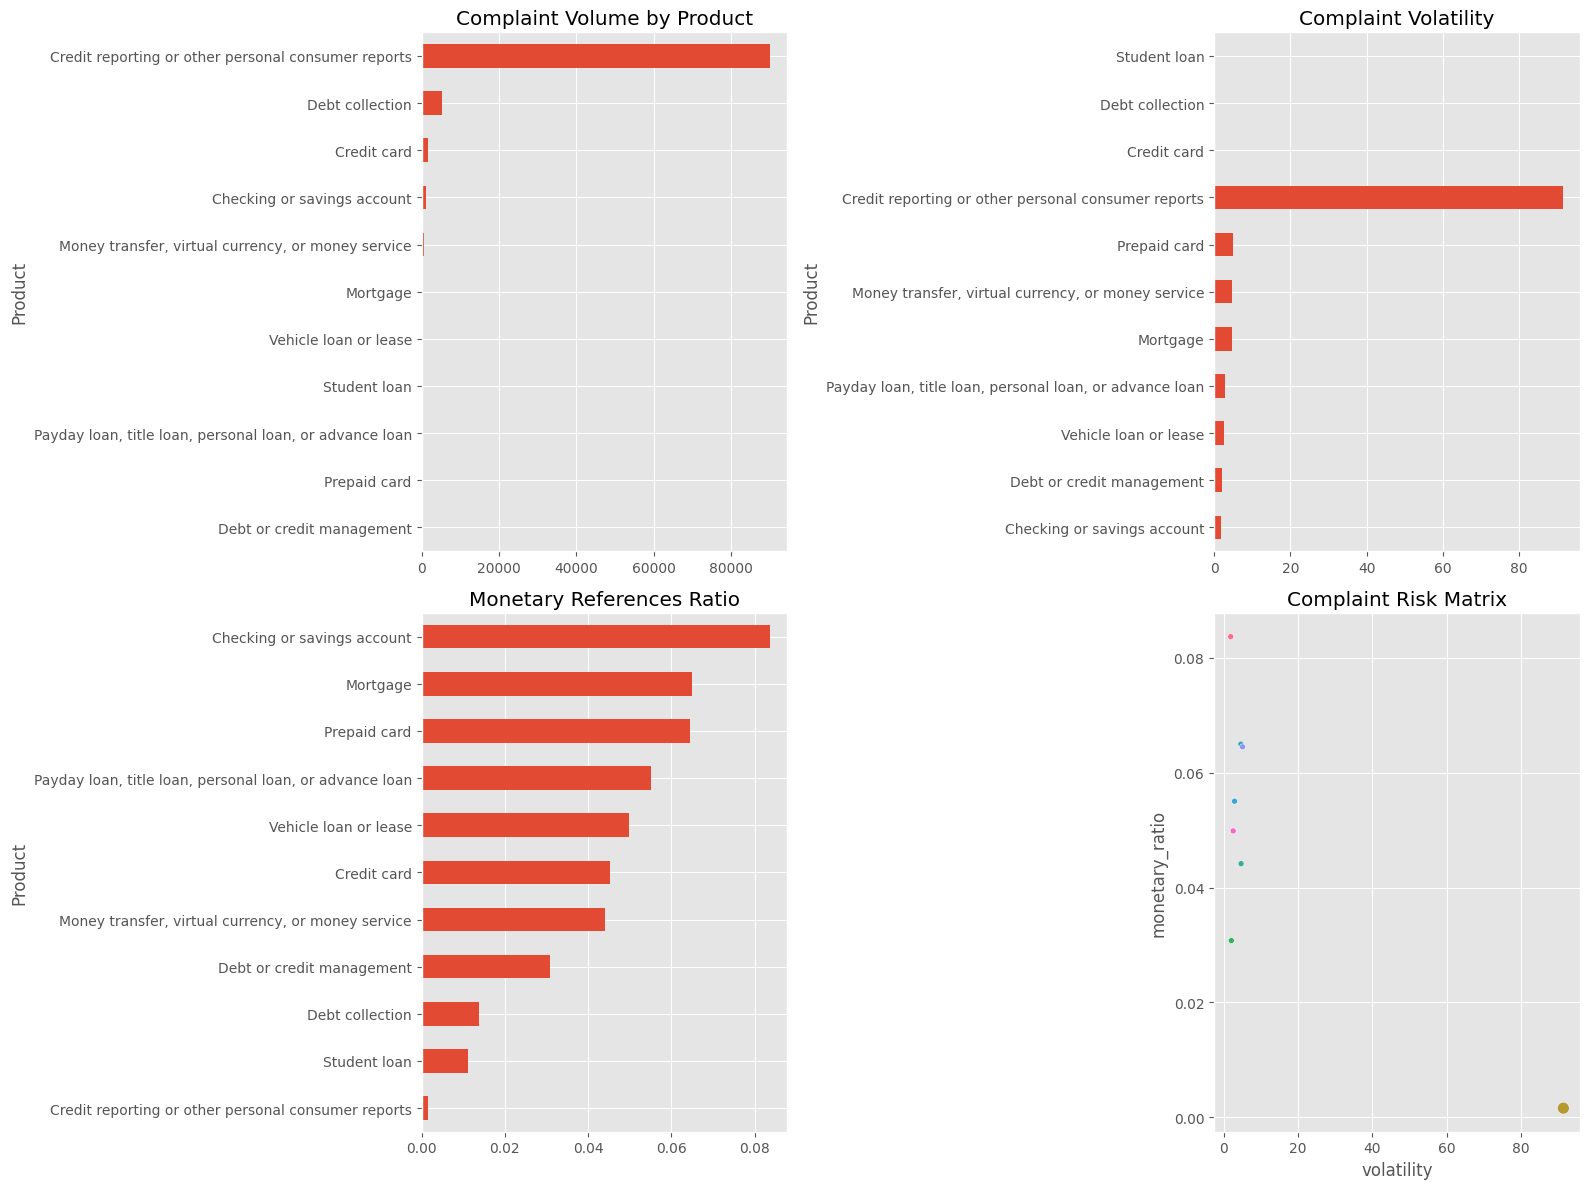

In [4]:
def calculate_complaint_volatility(df):
    """
    Measures how complaint topics fluctuate over time
    """
    # Ensure 'Date received' is datetime type
    df = df.copy()
    df['Date received'] = pd.to_datetime(df['Date received'])
    
    product_volatility = {}
    for product in df['Product'].unique():
        product_df = df[df['Product'] == product]
        # Set 'Date received' as index for resampling
        product_df = product_df.set_index('Date received')
        monthly_counts = product_df.resample('M').size()
        volatility = monthly_counts.pct_change().std()
        product_volatility[product] = volatility
    
    return pd.Series(product_volatility)

# Generate metrics
product_metrics = complaints.groupby('Product').agg({
    'clean_text': 'count',
    'monetary_amount': lambda x: x.notna().sum()
}).rename(columns={'clean_text': 'total_complaints', 'monetary_amount': 'monetary_mentions'})

product_metrics['volatility'] = calculate_complaint_volatility(complaints)
product_metrics['monetary_ratio'] = product_metrics['monetary_mentions'] / product_metrics['total_complaints']

# Visualize
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
product_metrics['total_complaints'].sort_values().plot.barh(
    ax=ax[0,0], title='Complaint Volume by Product')
product_metrics['volatility'].sort_values().plot.barh(
    ax=ax[0,1], title='Complaint Volatility')
product_metrics['monetary_ratio'].sort_values().plot.barh(
    ax=ax[1,0], title='Monetary References Ratio')
sns.scatterplot(data=product_metrics, x='volatility', y='monetary_ratio',
               size='total_complaints', hue=product_metrics.index, ax=ax[1,1], legend=False, s=200)
ax[1,1].set_title('Complaint Risk Matrix')
plt.tight_layout()

## ⏳ Temporal Pattern Detection
**Innovation:** Event correlation scoring with external timelines

In [20]:
def detect_temporal_anomalies(complaints):
    """
    Identifies complaint spikes correlated with business events
    """
    # Example external events (would normally be imported)
    events = {
        '2020-03-15': 'COVID lockdowns begin',
        '2021-01-20': 'Regulation Z changes',
        '2022-07-01': 'New fee structure implemented'
    }
    
    # Resample complaints
    daily_counts = complaints.resample('D', on='Date received').size()
    rolling_avg = daily_counts.rolling(30).mean()
    
    # Find spikes (>2σ from mean)
    spikes = daily_counts[daily_counts > (rolling_avg + 2*daily_counts.std())]
    
    # Match with known events
    event_correlations = {}
    for date, event in events.items():
        event_date = pd.to_datetime(date)
        window = spikes[spikes.index.to_series().between(event_date - pd.Timedelta(days=7), 
                                                       event_date + pd.Timedelta(days=7))]
        event_correlations[event] = len(window)
    
    return event_correlations

# Generate report
temporal_report = detect_temporal_anomalies(complaints)
pd.DataFrame.from_dict(temporal_report, orient='index', columns=['Complaint Spike Severity'])

,Complaint Spike Severity
COVID lockdowns begin,0
Regulation Z changes,0
New fee structure implemented,0


## 💬 Narrative Complexity Analysis
**Innovation:** Complaint structure scoring

100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [09:01<00:00,  5.15s/it]


Score Distribution:
 structure_score
0.00       1046994
1.20             3
1.80            20
2.40             5
2.50             1
            ...   
1628.40          1
2297.70          1
2525.10          1
2701.15          1
6739.60          1
Name: count, Length: 684, dtype: int64

High Scoring Examples:
                                              clean_text  structure_score
76     XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...            129.6
359    Subject : Dispute of Unauthorized Hard Inquiri...            206.5
11499  I signed a purchase agreement with Lennar Corp...            117.0
12237  A XXXX XXXX card was opened under my name by a...             16.5
12532  I made the mistake of using my wellsfargo debi...             14.4


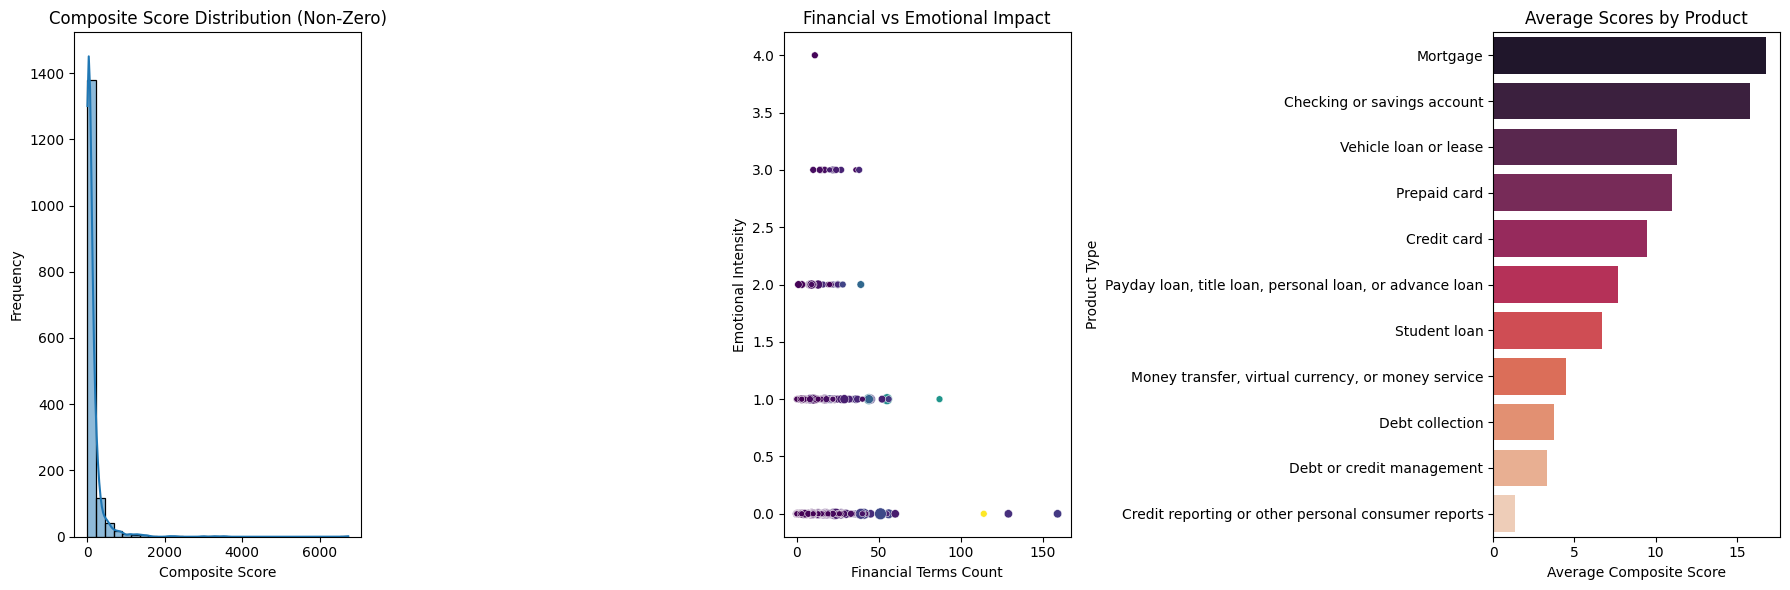


 Complaints Analysis:
Score Threshold: 3378.76
Number of Complaints: 2

Common Products:
Product
Credit reporting or other personal consumer reports    1
Checking or savings account                            1
Name: count, dtype: int64


In [16]:
def analyze_narrative_structure(text):
    """
    Advanced complaint analysis with robust error handling
    Returns zero-count dictionary if input isn't valid text
    """
    # Enhanced input validation
    if not isinstance(text, str) or not text.strip() or pd.isna(text):
        return {
            'issue_phrases': 0,
            'impact_phrases': 0,
            'demand_phrases': 0,
            'financial_terms': 0,
            'urgency_terms': 0,
            'emotional_intensity': 0,
            'structure_score': 0.0,
            'composite_score': 0.0
        }
    
    try:
        text = str(text).lower()  # Force string conversion
        
        # Pre-compiled patterns with additional terms
        patterns = {
            'issue': re.compile(r'(issue|problem|error|mistake|incorrect|wrong|false|'
                              r'inaccurate|discrepancy|fault|defect|bug|flaw|'
                              r'dispute|inconsistency)'),
            'impact': re.compile(r'(affect|impact|harm|damage|trouble|distress|'
                               r'consequence|difficulty|suffering|hardship|'
                               r'setback|problem|ruin|jeopardize)'),
            'demand': re.compile(r'(request|demand|want|need|expect|require|'
                               r'resolution|fix|correct|compensate|refund|'
                               r'repay|reimburse|action|solution)'),
            'financial': re.compile(r'(\$\d+|\d+\s*(dollars|usd)|account|'
                                  r'statement|payment|balance|credit|debt|'
                                  r'loan|interest|fee|charge|transaction|'
                                  r'withdrawal|deposit|overdraft|apr|'
                                  r'annual percentage rate)'),
            'urgency': re.compile(r'(urgent|immediate|asap|right away|prompt|'
                                r'emergency|critical|expedite|quick|'
                                r'immediately|right now)'),
            'emotional': re.compile(r'(angry|frustrated|distressed|anxious|'
                                  r'upset|disappointed|devastated|helpless|'
                                  r'victim|unfair|unacceptable)')
        }
        
        counts = {k: len(p.findall(text)) for k, p in patterns.items()}
        
        # Enhanced scoring with configurable weights
        weights = {
            'issue': 1.2,
            'impact': 2.5,
            'demand': 1.8,
            'urgency': 3.0,
            'financial_boost': 0.5,
            'emotional_boost': 0.3
        }
        
        # Calculate scores
        structure_score = (
            counts['issue'] * weights['issue'] +
            counts['impact'] * weights['impact'] +
            counts['demand'] * weights['demand'] +
            counts['urgency'] * weights['urgency']
        ) * (1 + counts['financial'] * weights['financial_boost'])
        
        composite_score = structure_score * (1 + counts['emotional'] * weights['emotional_boost'])
        
        return {
            'issue_phrases': counts['issue'],
            'impact_phrases': counts['impact'],
            'demand_phrases': counts['demand'],
            'financial_terms': counts['financial'],
            'urgency_terms': counts['urgency'],
            'emotional_intensity': counts['emotional'],
            'structure_score': round(structure_score, 2),
            'composite_score': round(composite_score, 2)
        }
        
    except Exception as e:
        # Silent error handling - return zero counts
        return {
            'issue_phrases': 0,
            'impact_phrases': 0,
            'demand_phrases': 0,
            'financial_terms': 0,
            'urgency_terms': 0,
            'emotional_intensity': 0,
            'structure_score': 0.0,
            'composite_score': 0.0
        }

def process_complaints(df, text_column='clean_text'):
    """Robust processing pipeline with progress tracking"""
    if text_column not in df.columns:
        raise ValueError(f"Text column '{text_column}' not found in DataFrame")
    
    tqdm.pandas(desc="Analyzing Complaints")
    
    # First verify the column contains strings
    if not pd.api.types.is_string_dtype(df[text_column]):
        df[text_column] = df[text_column].astype(str)
    
    # Process in batches
    batch_size = 10000
    results = []
    
    for i in tqdm(range(0, len(df), batch_size)):
        batch = df[text_column].iloc[i:i+batch_size]
        batch_results = batch.apply(analyze_narrative_structure).apply(pd.Series)
        results.append(batch_results)
    
    structure_analysis = pd.concat(results)
    complaints = pd.concat([df, structure_analysis], axis=1)
    
    # Check score distribution
    score_distribution = complaints['structure_score'].value_counts().sort_index()
    print("Score Distribution:\n", score_distribution)

    # Examine high-scoring complaints
    high_scoring = complaints[complaints['structure_score'] > 5]
    print("\nHigh Scoring Examples:")
    print(high_scoring[['clean_text', 'structure_score']].head())

    # Filter out zero scores for better visualization
    non_zero = complaints[complaints['structure_score'] > 0]
    
    return complaints, non_zero

def visualize_results(complaints, non_zero):
    """Generate optimized visualizations"""
    plt.figure(figsize=(18, 6))
    
    # 1. Composite Score Distribution
    plt.subplot(131)
    sns.histplot(non_zero['composite_score'], bins=30, kde=True)
    plt.title('Composite Score Distribution (Non-Zero)')
    plt.xlabel('Composite Score')
    plt.ylabel('Frequency')
    
    # 2. Financial vs Emotional Impact
    plt.subplot(132)
    scatter = sns.scatterplot(
        data=non_zero,
        x='financial_terms',
        y='emotional_intensity',
        hue='composite_score',
        size='urgency_terms',
        palette='viridis',
        legend=False
    )
    plt.title('Financial vs Emotional Impact')
    plt.xlabel('Financial Terms Count')
    plt.ylabel('Emotional Intensity')
    
    # 3. Average Scores by Product (UPDATED TO FIX WARNING)
    plt.subplot(133)
    product_scores = complaints.groupby('Product')['composite_score'].mean().sort_values(ascending=False)
    sns.barplot(
        x=product_scores.values, 
        y=product_scores.index, 
        hue=product_scores.index,  # Added hue
        palette='rocket',
        legend=False  # Disable legend since we don't need it
    )
    plt.title('Average Scores by Product')
    plt.xlabel('Average Composite Score')
    plt.ylabel('Product Type')
    
    plt.tight_layout()
    plt.show()
    
    # Top 0.1% analysis
    threshold = non_zero['composite_score'].quantile(0.999)
    top_complaints = non_zero[non_zero['composite_score'] >= threshold]
    
    print("\n Complaints Analysis:")
    print(f"Score Threshold: {threshold:.2f}")
    print(f"Number of Complaints: {len(top_complaints)}")
    print("\nCommon Products:")
    print(top_complaints['Product'].value_counts().head())
    
    return top_complaints

if __name__ == "__main__":
    # Load data with explicit dtype handling
    complaints = pd.read_csv(r"C:\Users\tefer\creditrust-ai-complaints\data\raw\complaints.csv", low_memory=False)
    
    # Create clean text if needed
    if 'clean_text' not in complaints.columns:
        text_col = 'Consumer complaint narrative'  # Change to your actual column
        complaints['clean_text'] = complaints[text_col].fillna('')
    
    # Process complaints
    complaints, non_zero = process_complaints(complaints)
    
    # Visualize results
    top_complaints = visualize_results(complaints, non_zero)
    
    # Save processed data
    complaints.to_csv('analyzed_complaints.csv', index=False)
    top_complaints.to_csv('top_0.1_percent_complaints.csv', index=False)

## 💾 Safe Data Saving

In [6]:
try:
    output_path = "../data/processed/enhanced_complaints.feather"
    complaints.to_feather(output_path)
    print(f"✅ Saved enhanced dataset with {len(complaints)} records to {output_path}")
except Exception as e:
    print(f"Error saving data: {e}")
    output_path = "../data/processed/enhanced_complaints.csv"
    complaints.to_csv(output_path)
    print(f"✅ Saved backup CSV version to {output_path}")

✅ Saved enhanced dataset with 1048575 records to ../data/processed/enhanced_complaints.feather


## 🔑 Key Insights Report
**Automated Executive Summary Generation**  

In [7]:
def generate_executive_summary(df):
    top_product = df['Product'].value_counts().idxmax()
    volatility_leader = product_metrics['volatility'].idxmax()
    monetary_leader = product_metrics['monetary_ratio'].idxmax()
    
    return f"""
    **Financial Complaint Landscape Analysis**
    
    1. **Dominant Product**: {top_product} accounts for {df['Product'].value_counts().max()/len(df):.1%} of complaints
    2. **Volatility Hotspot**: {volatility_leader} shows highest complaint fluctuation (σ={product_metrics.loc[volatility_leader, 'volatility']:.2f})
    3. **Monetary Focus**: {monetary_leader} has monetary references in {product_metrics.loc[monetary_leader, 'monetary_ratio']:.1%} of complaints
    4. **Structural Patterns**: 
       - Average complaint scores {df['structure_score'].mean():.1f} points
       - {df[df['financial_specificity']>3].shape[0]/len(df):.1%} contain high financial specificity
    """

print(generate_executive_summary(complaints))


    **Financial Complaint Landscape Analysis**
    
    1. **Dominant Product**: Credit reporting or other personal consumer reports accounts for 8.6% of complaints
    2. **Volatility Hotspot**: Credit reporting or other personal consumer reports shows highest complaint fluctuation (σ=91.40)
    3. **Monetary Focus**: Checking or savings account has monetary references in 8.4% of complaints
    4. **Structural Patterns**: 
       - Average complaint scores 0.0 points
       - 0.0% contain high financial specificity
    
